# Goal:
---
- Does high-dose simvastatin usage affect the risk of developing lung cancer compared to low-dose usage?

# Step 1: Install Necessary Packages
---
<font color='red'>Note</font>
1. Only run these codes once.
2. If an additional package is needed type: install.packages("name of package here"), and run by pressing shift+Enter.

In [205]:
install.packages("dplyr")
install.packages("aVirtualTwins")
install.packages("knitr")
install.packages("formattable")
install.packages("rpart")
install.packages("rpart.plot")


The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpQTCjk8/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpQTCjk8/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpQTCjk8/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpQTCjk8/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpQTCjk8/downloaded_packages

The downloaded binary packages are in
	/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T//RtmpQTCjk8/downloaded_packages


In [206]:
library(dplyr)
library(aVirtualTwins)
library(randomForest, verbose = F)
library(knitr)
library(formattable)
library(rpart)
library(rpart.plot)

# Step 2: Load the dataset
---
- Use the load("name of the RData") to load.

In [157]:
load("Df_regression.RData")

# Step 3: Check the content of the dataset
---
Use the ls() function to check of the RData set has a set of contents.

In [158]:
ls()

[1] "Codes_dictionary"     "Df_regression_unique" "df"                  
 [4] "df2"                  "df3"                  "df4"                 
 [7] "model.rf"             "model.rf.trt0"        "model.rf.trt1"       
[10] "name_map"             "tr.class"             "tr.reg"              
[13] "vt.doublef.rf"        "vt.f.rf"              "vt.o"                
[16] "vt.sbgrps"

# Step 4: Check the class of the dataset to check for its data structure.
---
- Use the class() function to check the data structure.

In [159]:
class(Df_regression_unique)

[1] "data.frame"

# Step 4: Get a snapshot of the data
---

1. Snapshots are important because we can see how our data looks like without looking at the entire dataset.

2. In my practice I usually look at the tail in of the dataset, for me this is ideal because of two things:

        a. By using the tail we can check how many rows the dataset is.

        b. We can also check the datatype of each columns.

3. Change the column names, if necessary.

In [160]:
tail(Df_regression_unique)

,ptnum,label,C-424144002,C-263495000,C-103579009,C-72166-2,C-763302001,C-39156-5,C-185086009,C-21908-9,C-233604007,C-195967001,C-132281000119108,Followup,Exposure
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<int>,<dbl>
5933,p9972,0,53,f,white,never,TRUE,29.66,NA,NA,NA,NA,NA,822,1
5934,p9976,0,70,m,white,former,TRUE,30.06,NA,NA,NA,NA,NA,3042,1
5935,p9982,0,70,m,black,never,TRUE,31.07,NA,NA,NA,NA,NA,1233,1
5936,p9992,1,75,m,white,never,TRUE,29.60,NA,NA,NA,NA,NA,1838,1
5937,p9996,0,59,m,white,never,TRUE,27.30,NA,NA,NA,NA,NA,2374,2
5938,p9998,0,46,f,white,former,TRUE,27.60,NA,NA,NA,NA,NA,356,1


# Step 5: Rename the columns
---
This is best practice so that other non-technical people can also interpret the result.

In [161]:
load("Ontology.RData")
# Create a named vector from the codes dictionary
name_map <- setNames(Codes_dictionary$name, Codes_dictionary$code)
# Rename only matching columns
names(Df_regression_unique) <- ifelse(
  names(Df_regression_unique) %in% names(name_map), # Check if column name exists in the dictionary
  name_map[names(Df_regression_unique)],           # Replace with the new name if it matches
  names(Df_regression_unique)                      # Keep original name if no match
)

In [162]:
Df_regression_unique

,ptnum,label,age,gender,race,Tobacco smoking status NHIS,Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure),Body Mass Index,Chronic obstructive bronchitis (disorder),Stage group.clinical Cancer,Pneumonia (disorder),Asthma,Acute deep venous thrombosis (disorder),Followup,Exposure
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<int>,<dbl>
1,p10000,1,72,m,asian,former,TRUE,28.10,NA,NA,NA,NA,NA,985,1
2,p10005,0,70,m,white,never,TRUE,27.90,NA,NA,NA,NA,NA,2897,2
3,p10006,0,65,m,white,never,TRUE,28.70,NA,NA,TRUE,NA,NA,2244,2
4,p10009,0,66,m,white,never,TRUE,29.92,NA,NA,NA,NA,NA,1103,1
5,p10018,0,67,m,white,never,TRUE,28.00,NA,NA,NA,NA,NA,1761,1
6,p10019,0,69,m,white,former,TRUE,34.20,NA,NA,NA,NA,NA,1597,2
7,p10026,1,69,m,white,former,TRUE,29.97,NA,NA,NA,NA,NA,3151,1
8,p10029,0,62,f,white,former,TRUE,29.26,TRUE,NA,NA,NA,NA,1149,1
9,p10034,1,72,m,white,never,TRUE,27.40,NA,NA,NA,NA,NA,1662,1


# Step 6: Copy your dataframe
---
If your analysis involves feature engineering which involved data manipulation, dropping columns, or creating new columns it is best practice to make acopy your dataset.

In [163]:
df<-Df_regression_unique

# Step 6: Rename the response (dependent) variable
---

In [164]:
names(df)[names(df) == 'label'] <- 'lung_cancer_developed?'
names(df)[names(df) == 'Stage group.clinical Cancer'] <- 'lung_cancer_stage'

In [165]:
df

,ptnum,lung_cancer_developed?,age,gender,race,Tobacco smoking status NHIS,Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure),Body Mass Index,Chronic obstructive bronchitis (disorder),lung_cancer_stage,Pneumonia (disorder),Asthma,Acute deep venous thrombosis (disorder),Followup,Exposure
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<int>,<dbl>
1,p10000,1,72,m,asian,former,TRUE,28.10,NA,NA,NA,NA,NA,985,1
2,p10005,0,70,m,white,never,TRUE,27.90,NA,NA,NA,NA,NA,2897,2
3,p10006,0,65,m,white,never,TRUE,28.70,NA,NA,TRUE,NA,NA,2244,2
4,p10009,0,66,m,white,never,TRUE,29.92,NA,NA,NA,NA,NA,1103,1
5,p10018,0,67,m,white,never,TRUE,28.00,NA,NA,NA,NA,NA,1761,1
6,p10019,0,69,m,white,former,TRUE,34.20,NA,NA,NA,NA,NA,1597,2
7,p10026,1,69,m,white,former,TRUE,29.97,NA,NA,NA,NA,NA,3151,1
8,p10029,0,62,f,white,former,TRUE,29.26,TRUE,NA,NA,NA,NA,1149,1
9,p10034,1,72,m,white,never,TRUE,27.40,NA,NA,NA,NA,NA,1662,1


# Step 7: Check the values of the "Stage group.clinical Cancer" column
---
- Best practice to determine the unique values of a suspected categorical column.
- Null values indicates that the patient did not develop lung cancer at the start of the study.

In [166]:
# Check the values of 'Stage group.clinical Cancer' column
unique(df$'lung_cancer_stage')

[1] NA        "stage4"  "stage2a" "stage1a" "stage3a" "stage2b" "stage3b"
[8] "stage1b"

# Step 8: Change the null values to "No Cancer"
---

In [167]:
# Replace NA values with "no_cancer"
df$`lung_cancer_stage`[is.na(df$`lung_cancer_stage`)] <- "no_cancer"

# Step 9: Check the unique values of the "Exposure" columns
---

A value of 1 is low dose, and a value of 2 is high dose

In [168]:
unique(df$'Exposure')

[1] 1 2

# Step 10: Transform the Exposure values into binary format.
---
- It's best practice to transform any binary categorical variable into its binary format.

In [169]:
df$'Exposure' <- ifelse(df$'Exposure' == 2, 1, 0)

# Step 11: We will exclude patients who already have been diagnosed with the different stages of lung cancer
---

In [170]:
df2<-filter(df,lung_cancer_stage == 'no_cancer')

In [171]:
df2

ptnum,lung_cancer_developed?,age,gender,race,Tobacco smoking status NHIS,Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure),Body Mass Index,Chronic obstructive bronchitis (disorder),lung_cancer_stage,Pneumonia (disorder),Asthma,Acute deep venous thrombosis (disorder),Followup,Exposure
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<int>,<dbl>
p10000,1,72,m,asian,former,TRUE,28.10,NA,no_cancer,NA,NA,NA,985,0
p10005,0,70,m,white,never,TRUE,27.90,NA,no_cancer,NA,NA,NA,2897,1
p10006,0,65,m,white,never,TRUE,28.70,NA,no_cancer,TRUE,NA,NA,2244,1
p10009,0,66,m,white,never,TRUE,29.92,NA,no_cancer,NA,NA,NA,1103,0
p10018,0,67,m,white,never,TRUE,28.00,NA,no_cancer,NA,NA,NA,1761,0
p10019,0,69,m,white,former,TRUE,34.20,NA,no_cancer,NA,NA,NA,1597,1
p10026,1,69,m,white,former,TRUE,29.97,NA,no_cancer,NA,NA,NA,3151,0
p10029,0,62,f,white,former,TRUE,29.26,TRUE,no_cancer,NA,NA,NA,1149,0
p10034,1,72,m,white,never,TRUE,27.40,NA,no_cancer,NA,NA,NA,1662,0


# Step 12: Check the other categorical columns, and columns with null values.
---
- This is to check if they are categorical, logical, boolean, or numerical.

In [172]:
unique(df2$'Tobacco smoking status NHIS')

[1] "former" "never"

In [173]:
unique(df2$'Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure)')

[1] TRUE   NA

In [174]:
unique(df2$'Chronic obstructive bronchitis (disorder)')

[1]   NA TRUE

In [175]:
unique(df2$'Pneumonia (disorder)')

[1]   NA TRUE

In [176]:
unique(df2$'Asthma')

[1]   NA TRUE

In [177]:
unique(df2$'Acute deep venous thrombosis')

[1]   NA TRUE

# Step 13: Change all null values to 0, indicating False
---

In [178]:
df2$'Tobacco smoking status NHIS' <- ifelse(df2$'Tobacco smoking status NHIS' == "former", 1, 0)

df2$'Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure)'[is.na(df2$'Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure)')] <- 0
df2$'Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure)' <- as.integer(df2$'Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure)')

df2$'Chronic obstructive bronchitis (disorder)'[is.na(df2$'Chronic obstructive bronchitis (disorder)')] <- 0
df2$'Chronic obstructive bronchitis (disorder)' <- as.integer(df2$'Chronic obstructive bronchitis (disorder)')

df2$'Pneumonia (disorder)'[is.na(df2$'Pneumonia (disorder)')] <- 0
df2$'Pneumonia (disorder)' <- as.integer(df2$'Pneumonia (disorder)')

df2$'Asthma'[is.na(df2$'Asthma')] <- 0
df2$'Asthma' <- as.integer(df2$'Asthma')

df2$'Acute deep venous thrombosis (disorder)'[is.na(df2$'Acute deep venous thrombosis (disorder)')] <- 0
df2$'Acute deep venous thrombosis (disorder)' <- as.integer(df2$'Acute deep venous thrombosis (disorder)')

In [179]:
df2

ptnum,lung_cancer_developed?,age,gender,race,Tobacco smoking status NHIS,Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure),Body Mass Index,Chronic obstructive bronchitis (disorder),lung_cancer_stage,Pneumonia (disorder),Asthma,Acute deep venous thrombosis (disorder),Followup,Exposure
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>
p10000,1,72,m,asian,1,1,28.10,0,no_cancer,0,0,0,985,0
p10005,0,70,m,white,0,1,27.90,0,no_cancer,0,0,0,2897,1
p10006,0,65,m,white,0,1,28.70,0,no_cancer,1,0,0,2244,1
p10009,0,66,m,white,0,1,29.92,0,no_cancer,0,0,0,1103,0
p10018,0,67,m,white,0,1,28.00,0,no_cancer,0,0,0,1761,0
p10019,0,69,m,white,1,1,34.20,0,no_cancer,0,0,0,1597,1
p10026,1,69,m,white,1,1,29.97,0,no_cancer,0,0,0,3151,0
p10029,0,62,f,white,1,1,29.26,1,no_cancer,0,0,0,1149,0
p10034,1,72,m,white,0,1,27.40,0,no_cancer,0,0,0,1662,0


# Step 14: Remove the ptnum as this is the patient number.
---

In [180]:
df3 <- subset(df2,select = -c(ptnum,lung_cancer_stage))

In [181]:
df3

,lung_cancer_developed?,age,gender,race,Tobacco smoking status NHIS,Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure),Body Mass Index,Chronic obstructive bronchitis (disorder),Pneumonia (disorder),Asthma,Acute deep venous thrombosis (disorder),Followup,Exposure
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,72,m,asian,1,1,28.10,0,0,0,0,985,0
2,0,70,m,white,0,1,27.90,0,0,0,0,2897,1
3,0,65,m,white,0,1,28.70,0,1,0,0,2244,1
4,0,66,m,white,0,1,29.92,0,0,0,0,1103,0
5,0,67,m,white,0,1,28.00,0,0,0,0,1761,0
6,0,69,m,white,1,1,34.20,0,0,0,0,1597,1
7,1,69,m,white,1,1,29.97,0,0,0,0,3151,0
8,0,62,f,white,1,1,29.26,1,0,0,0,1149,0
9,1,72,m,white,0,1,27.40,0,0,0,0,1662,0


# Step 15: Perform exploaratory data analysis
---

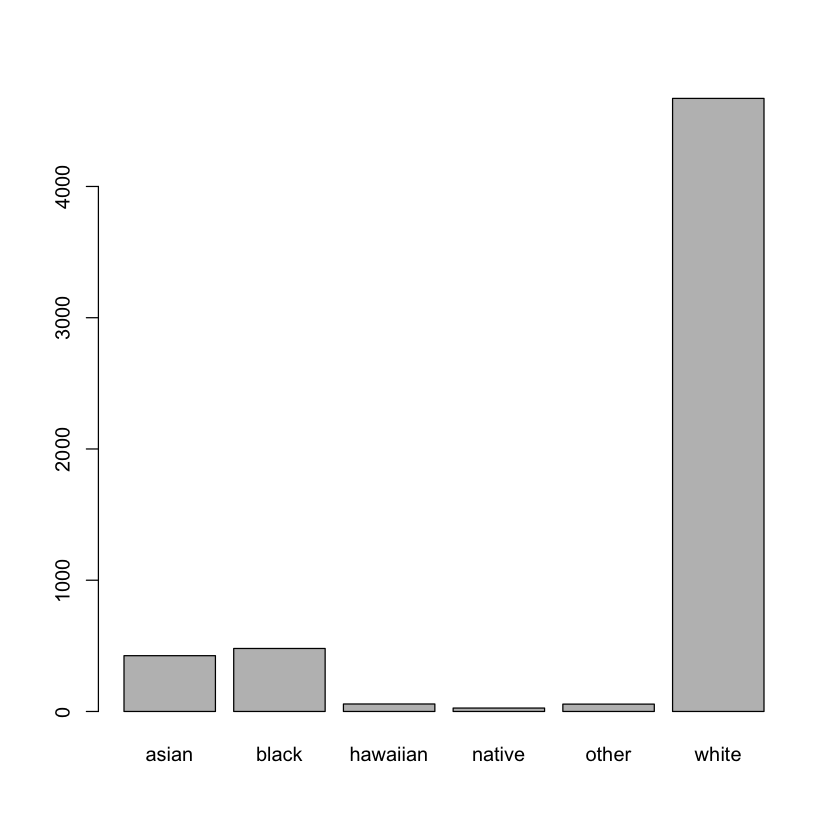

In [182]:
barplot(table(df3$race))

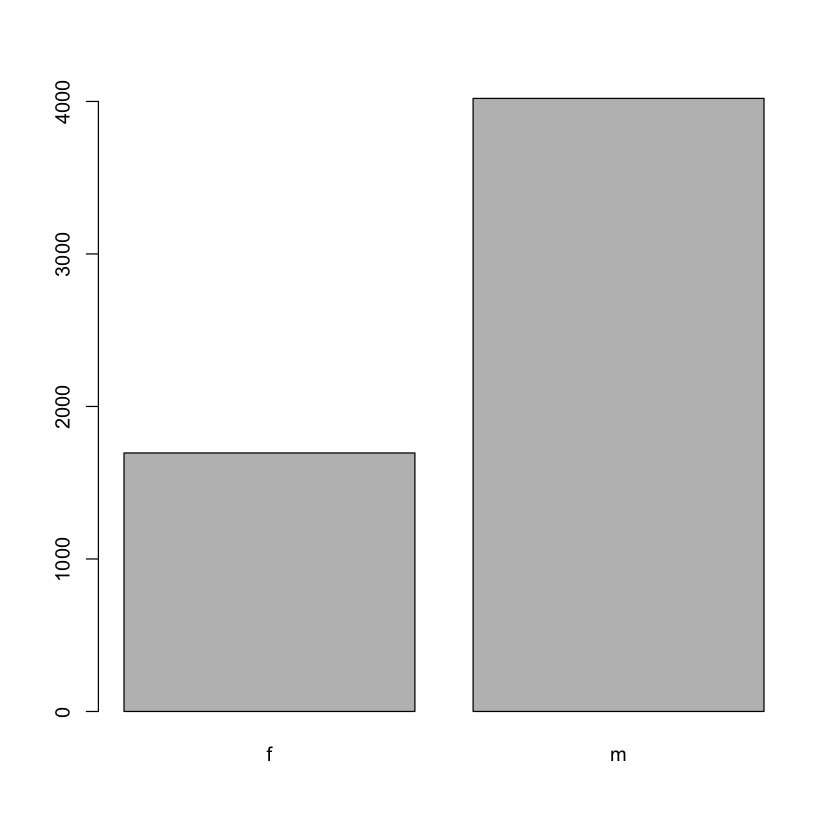

In [183]:
barplot(table(df3$gender))

# Step 16: Perform feature engineering by creating new columns from race and gender
---

In [184]:
df3$"gender" <- ifelse(df3$"gender" == "m", 1, 0)
names(df3)[names(df3) == 'gender'] <- 'male'

In [185]:
df3 <- df3 %>%
  mutate(
    asian = ifelse(`race` == "asian", 1, 0),
    white = ifelse(`race` == "white", 1, 0),
    black = ifelse(`race` == "black", 1, 0),
    hawaiian = ifelse(`race` == "hawaiian", 1, 0),
    native = ifelse(`race` == "native", 1, 0)
  ) %>%
  select(-"race")  # Remove the original column if not needed

In [186]:
df3

,lung_cancer_developed?,age,male,Tobacco smoking status NHIS,Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure),Body Mass Index,Chronic obstructive bronchitis (disorder),Pneumonia (disorder),Asthma,Acute deep venous thrombosis (disorder),Followup,Exposure,asian,white,black,hawaiian,native
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,72,1,1,1,28.10,0,0,0,0,985,0,1,0,0,0,0
2,0,70,1,0,1,27.90,0,0,0,0,2897,1,0,1,0,0,0
3,0,65,1,0,1,28.70,0,1,0,0,2244,1,0,1,0,0,0
4,0,66,1,0,1,29.92,0,0,0,0,1103,0,0,1,0,0,0
5,0,67,1,0,1,28.00,0,0,0,0,1761,0,0,1,0,0,0
6,0,69,1,1,1,34.20,0,0,0,0,1597,1,0,1,0,0,0
7,1,69,1,1,1,29.97,0,0,0,0,3151,0,0,1,0,0,0
8,0,62,0,1,1,29.26,1,0,0,0,1149,0,0,1,0,0,0
9,1,72,1,0,1,27.40,0,0,0,0,1662,0,0,1,0,0,0


# Step 17: Renaming columns using snake_case, PascalCase, camcelCase in naming columns.
---
- snake_case: all small letters, each word separated by an underscore example instead of New York use new_york.

- PascalCase: only first letters are capitalized and no space, example instead of New York use NewYork.

- camelCase: Only the first letter of the second word is capitalized with no space, example instead of New York use newYork.

In [187]:
names(df3)[names(df3) == 'Tobacco smoking status NHIS'] <- 'tobacco_smoking_status'

names(df3)[names(df3) == 'Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure)'] <- 'alcohol_assessment'

names(df3)[names(df3) == 'Body Mass Index'] <- 'bmi'

names(df3)[names(df3) == 'Chronic obstructive bronchitis (disorder)'] <- 'copd'

names(df3)[names(df3) == 'Pneumonia (disorder)'] <- 'pneumonia'

names(df3)[names(df3) == 'Acute deep venous thrombosis (disorder)'] <- 'adv'

In [203]:
tail(df3)

,lung_cancer_developed?,age,male,tobacco_smoking_status,alcohol_assessment,bmi,copd,pneumonia,Asthma,adv,Followup,Exposure,asian,white,black,hawaiian,native
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5710,0,53,0,0,1,29.66,0,0,0,0,822,0,0,1,0,0,0
5711,0,70,1,1,1,30.06,0,0,0,0,3042,0,0,1,0,0,0
5712,0,70,1,0,1,31.07,0,0,0,0,1233,0,0,0,1,0,0
5713,1,75,1,0,1,29.60,0,0,0,0,1838,0,0,1,0,0,0
5714,0,59,1,0,1,27.30,0,0,0,0,2374,1,0,1,0,0,0
5715,0,46,0,1,1,27.60,0,0,0,0,356,0,0,1,0,0,0


# Step 18: Construction of a virtual twin
---
<font color='red'>Note</font>

- Find a subgroup of patients that developed lung cancer given different doses of statin, if it exists.

let: $𝑃_{1𝑖}=𝑃(𝑌_𝑖=1|𝑇_𝑖=1,𝑋_𝑖)$

let: $𝑃_{0𝑖}=𝑃(𝑌_𝑖=1|𝑇_𝑖=0,𝑋_𝑖)$

let: $𝑋={𝑋_1,…,𝑋_i}$

### First Step
---
1. Grow a random forest with data ${𝑌,𝑇,𝑋}$.
2. Grow a random forest with interaction treatement, or covariables, i.e. ${𝑌,𝑇,𝑋,𝑋𝐼(𝑇_𝑖=0),𝑋𝐼(𝑇_𝑖=1)}$
3. Grow two random forests, one for each treatement:

a. The first with data $\{𝑌,𝑋\}$, where $𝑇_𝑖=0$

b. The second with data $\{𝑌,𝑋\}$, where $𝑇_𝑖=1$


4. By building the model from one of these methods $P_{1i}$ and $P_{0i}$ can be estimated.

5. Related functions/classes in aVirtualTwins package : VT.difft(), vt.forest().


### Second Step
---
1. Define: $𝑍_𝑖=𝑃_{1𝑖}−𝑃_{0𝑖}$:
    
a. Use regression tree to explain 𝑍 by covariables 𝑋. Then subjects with predicted $𝑍_𝑖$ greater than some threshold 𝑐 are considered to define a subgroup.
        
b. Use classification tree on new variable 𝑍∗ defined by 𝑍∗𝑖=1, if 𝑍𝑖>𝑐 and 𝑍∗𝑖=0 otherwise.

2. The idea is to identify which covariable from 𝑋 described variation of 𝑍.

3. Related function in aVirtualTwins package : vt.tree().

# Step 19: Create object VirtualTwins
---
In order to begin the two steps of VT method, aVirtualTwins package needs to be initialized with vt.data() function.

In [189]:
vt.o <- vt.data(df3, outcome.field="lung_cancer_developed?", treatment.field="Exposure", interactions = TRUE)

"1" will be the favorable outcome 


# Step 20 : compute $𝑃_{1𝑖}$ and $𝑃_{0𝑖}$ using random forests
---

<font color='red'>Note:</font> this can be done via differents ways, here I will show you how to estimate the variables using simple random forest.

In [191]:
# For Reproducibility always set seed
set.seed(42) #very popular set seed among Python users
# Fit rf model 
# default params
# set interactions to TRUE if using interaction between T and X
model.rf <- randomForest(x = vt.o$getX(interactions = T),
                         y = vt.o$getY(),
                         ntree = 500)
# initialize VT.forest.one
vt.f.rf <- vt.forest("one", vt.data = vt.o, model = model.rf, interactions = T)
### or you can use randomForest inside vt.forest()
vt.f.rf <- vt.forest("one", vt.data = vt.o, interactions = T, ntree = 500)

Another method is to develop two random forests by perfoming double random forest on VT.object, the function vt.forest("double", ...) is used. 

It takes in arguments :

    forest.type : You have to set is to "double"
    vt.data : return of vt.data() function
    
    model_trt1 : a random forest model for 𝑇=1
     (this argument has to be specified)
     
    model_trt0 : a random forest model for 𝑇=0
     (this argument has to be specified)

NOTE: use trt parameter in VT.object::getX() or VT.object::getY() methods to obtain part of data depending on treatment. See following example.

In [192]:
# grow RF for T = 1
model.rf.trt1 <- randomForest(x = vt.o$getX(trt = 1),
                              y = vt.o$getY(trt = 1))
# grow RF for T = 0
model.rf.trt0 <- randomForest(x = vt.o$getX(trt = 0),
                              y = vt.o$getY(trt = 0))
# initialize VT.forest.double()
vt.doublef.rf <- vt.forest("double",
                           vt.data = vt.o, 
                           model_trt1 = model.rf.trt1, 
                           model_trt0 = model.rf.trt0)
### Or you can use randomForest() inside
vt.doublef.rf <- vt.forest("double",
                           vt.data = vt.o,
                           ntree = 200)

### <font color='red'>***Note***</font>: You can train your own ML

Random Forests are just one of the many  models you can use to compute $𝑃_{1𝑖}$ and $𝑃_{0𝑖}$. Any prediction model can be used, as logistic regression.

In [193]:
# initialize classification tree
tr.class <- vt.tree("class",
                    vt.difft = vt.f.rf,
                    sens = ">",
                    threshold = quantile(vt.f.rf$difft, seq(.5, .8, .1)),
                    maxdepth = 3,
                    cp = 0,
                    maxcompete = 2) 
# tr.class is a list if threshold is a vectoor
class(tr.class)
## [1] "list"
# acce trees with treeXX
class(tr.class$tree1)
## [1] "VT.tree.class"
## attr(,"package")
## [1] "aVirtualTwins"

[1] "list"

[1] "VT.tree.class"
attr(,"package")
[1] "aVirtualTwins"

In [194]:
# initialize regression tree
tr.reg <- vt.tree("reg",
                  vt.difft = vt.f.rf,
                  sens = ">",
                  threshold = quantile(vt.f.rf$difft, seq(.5, .8, .1)))
# tr.class is a list if threshold is a vectoor
class(tr.reg)
## [1] "list"
# access trees with treeXX
class(tr.reg$tree1)
## [1] "VT.tree.reg"
## attr(,"package")
## [1] "aVirtualTwins"

[1] "list"

[1] "VT.tree.reg"
attr(,"package")
[1] "aVirtualTwins"

In [195]:
# use tr.class computed previously
vt.sbgrps <- vt.subgroups(tr.class)
# print tables with knitr package
library(knitr)
knitr::kable(vt.sbgrps)



|         |Subgroup                                    |Subgroup size |Treatement event rate |Control event rate |Treatment sample size |Control sample size | RR (resub)| RR (snd)|
|:--------|:-------------------------------------------|:-------------|:---------------------|:------------------|:---------------------|:-------------------|----------:|--------:|
|tree1    |age< 70.5 & Followup>=1716                  |2884          |0.359                 |0.235              |615                   |2269                |      1.528|    1.771|
|tree2    |Followup>=1824 & age< 70.5                  |2774          |0.37                  |0.243              |592                   |2182                |      1.523|    1.769|
|tree3.11 |Followup< 1858 & Followup>=1740 & male< 0.5 |47            |0.167                 |0.049              |6                     |41                  |      3.408|    3.131|
|tree3.15 |Followup>=1858 & age< 70.5 & male< 0.5      |866           |0.323                 

In [200]:
formattable::formattable(vt.sbgrps)

,Subgroup,Subgroup size,Treatement event rate,Control event rate,Treatment sample size,Control sample size,RR (resub),RR (snd)
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
tree1,age< 70.5 & Followup>=1716,2884,0.359,0.235,615,2269,1.528,1.771
tree2,Followup>=1824 & age< 70.5,2774,0.37,0.243,592,2182,1.523,1.769
tree3.11,Followup< 1858 & Followup>=1740 & male< 0.5,47,0.167,0.049,6,41,3.408,3.131
tree3.15,Followup>=1858 & age< 70.5 & male< 0.5,866,0.323,0.108,124,742,2.991,4.097
tree4,Followup>=1884 & male< 0.5 & pneumonia< 0.5,824,0.36,0.13,111,713,2.769,3.473


# <font color = 'blue'>Interpretation of Results</font>
---

### Subgroup Insights:

Each subgroup represents a unique combination of characteristics where the treatment's effect was evaluated.

Example: For tree1, the subgroup is defined as age < 70.5 & Followup ≥ 1716.

### Subgroup Sizes:

Subgroup size is important for determining the reliability of the result.

Smaller sample sizes (e.g., tree3.11 with 47 individuals) may lead to less reliable estimates of RR due to a higher risk of variability.

### Event Rates:

Treatment Event Rate: Indicates the fraction of individuals in the treatment group who experienced the outcome.

Example: In tree1, 35.9% of treated individuals experienced the event.

### Control Event Rate: 

Indicates the fraction of individuals in the control group who experienced the outcome.

Example: In tree1, 23.5% of untreated individuals experienced the event.

### Relative Risk (RR):

RR (resub): A measure of how much the treatment changes the risk of the event compared to the control group, specific to the resubstitution approach.

An RR > 1 indicates a higher event rate in the treatment group than the control group.

Example: In tree1, RR = 1.528, meaning treated individuals were about 1.5 times more likely to experience the event than untreated ones.

### RR (snd): 

Likely a second validation of the RR, potentially derived from a different dataset, or method, for robustness.

# <font color = 'green'> Key Observations </font>:
---

### Treatment Effectiveness:

Look at the difference between the Treatment Event Rate and Control Event Rate to assess the treatment's effect.

Example: 

In tree3.15, treatment increased the event rate substantially (32.3% vs. 10.8%), with an RR of 2.991 (resub). Patients from this subgroup are 3 times more likely to developed lung cancer given a high dose of statins.

### Reliability:

Subgroups with larger sample sizes are more reliable (e.g., tree1 and tree2).

Small sample sizes, like in tree3.11, may lead to inflated RRs.

### Impact of Subgroup Characteristics:

Identify which subgroup characteristics (e.g., age, Followup, male, pneumonia) correlate with higher or lower treatment effectiveness.

# <font color = 'brown'>Quick Intro on How Decision Decision Trees Work</font>:
---

https://github.com/gerard-ompad/DATA_ANALYTICS/blob/main/Lecture_8/Decision_Tree.pdf